# 🧠 Fine-Tuning SAM (Segment Anything Model)

## 📌 What is SAM?

The **Segment Anything Model (SAM)** is a powerful image segmentation model developed by Meta AI. It is designed to generalize across a wide range of segmentation tasks without requiring task-specific training. SAM uses a **promptable design**, where it can segment objects based on different types of inputs like:

- Points
- Boxes
- Text prompts

### 🔧 Technical Architecture

- **Backbone:** Vision Transformer (ViT)
- **Inputs:** Image + Prompt(optional) (e.g., point, box)
- **Outputs:** Segmentation mask(s)
- **Core Idea:** Predicts masks corresponding to prompts using learned visual embeddings and attention mechanisms.

SAM is trained on a large and diverse dataset with over **1 billion masks** and performs zero-shot segmentation. However, its general nature might not perform optimally on **domain-specific** or **fine-grained** tasks.

---



## ❓ Why Fine-Tune SAM?

Despite SAM's strong zero-shot capabilities, **fine-tuning SAM** is necessary when:

- Working with **specialized domains** (e.g., medical, industrial, aerial imagery).
- Needing **higher accuracy** on specific classes or fine-grained objects.
- Improving **IoU scores** on your custom dataset.

Fine-tuning adapts SAM’s powerful general features to your task-specific dataset, significantly boosting performance.

---


## 🎯 Goal
Fine-tune the SAM (Segment Anything Model) using your custom dataset annotated in **YOLO** or **COCO** format.

---


## 🔄 Step-by-Step Workflow
---

Let's make sure that we have access to GPU. We can use nvidia-smi command to do that. In case of any problems navigate to Edit -> Notebook settings -> Hardware accelerator, set it to GPU, and then click Save.

In [13]:
!nvidia-smi

Thu Jun 12 09:02:04 2025       
+-----------------------------------------------------------------------------------------+
| NVIDIA-SMI 550.54.15              Driver Version: 550.54.15      CUDA Version: 12.4     |
|-----------------------------------------+------------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id          Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |           Memory-Usage | GPU-Util  Compute M. |
|                                         |                        |               MIG M. |
|=========================================+========================+======================|
|   0  Tesla T4                       Off |   00000000:00:04.0 Off |                    0 |
| N/A   77C    P0             43W /   70W |    3638MiB /  15360MiB |      0%      Default |
|                                         |                        |                  N/A |
+-----------------------------------------+-----

# Pre-requisites

1. firstly install PyTorch Lightning (lightweight wrapper for Train models more efficiently with less code) .

In [2]:
!pip install pytorch_lightning

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 3.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 63.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 93.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 64.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 6.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 17.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 7.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 5.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 77.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 962.5/962.5 kB 38.8 MB/s eta 0:00:00
  Attempting uninstall: nvidia-nvjitlink-cu12
    Found existing installation: nvidia-nvjitlink-cu12 12.5.82
    Uninstall

2. Download ZIP from Google Drive and unzip it.

In [3]:
import gdown
import zipfile, os

# Download dataset ZIP using gdown
file_id = '1bQBAmQf8DOA06-MxPvlmRbOfV97HLbDl'
zip_path = 'valid.zip'
extract_to = '/content/yolo_dataset'

# Download the file if not already
if not os.path.exists(zip_path):
    gdown.download(f'https://drive.google.com/uc?id={file_id}', zip_path, quiet=False)

# Unzip if not already extracted
if not os.path.exists(extract_to):
    with zipfile.ZipFile(zip_path, 'r') as zip_ref:
        zip_ref.extractall(extract_to)

# Change working directory to the dataset folder
os.chdir(extract_to)


Downloading...
From (original): https://drive.google.com/uc?id=1bQBAmQf8DOA06-MxPvlmRbOfV97HLbDl
From (redirected): https://drive.google.com/uc?id=1bQBAmQf8DOA06-MxPvlmRbOfV97HLbDl&confirm=t&uuid=d83e75c7-fa57-489e-93e2-bc806864aa28
To: /content/valid.zip
100%|██████████| 69.5M/69.5M [00:00<00:00, 103MB/s]


3. Clone the GitHub repository to access all necessary modules.

In [4]:
!git clone https://github.com/TheLunarLogic/SAMFinetuning.git

Cloning into 'SAMFinetuning'...
remote: Enumerating objects: 112, done.
remote: Counting objects: 100% (112/112), done.
remote: Compressing objects: 100% (105/105), done.
remote: Total 112 (delta 44), reused 42 (delta 4), pack-reused 0 (from 0)
Receiving objects: 100% (112/112), 59.26 KiB | 4.94 MiB/s, done.
Resolving deltas: 100% (44/44), done.


4. Setting path and extract dataset

In [5]:
# STEP 0: Mount Google Drive and unzip the dataset
from google.colab import drive
import zipfile, os
import sys
from pathlib import Path

drive.mount('/content/drive')

# Path to the zip file in Drive
zip_path = '/content/drive/MyDrive/Colab Notebooks/valid.zip'
extract_to = '/content/yolo_dataset'

# Unzip if not already
if not os.path.exists(extract_to):
    with zipfile.ZipFile(zip_path, 'r') as zip_ref:
        zip_ref.extractall(extract_to)

# Change working directory to where the dataset was extracted
os.chdir(extract_to)

# Run this ONCE after changing directory
# Add the SAMFinetuning directory to sys.path so modules can be imported
script_dir_relative = 'SAMFinetuning' # Relative path
if script_dir_relative not in sys.path:
    sys.path.insert(0, script_dir_relative) # Insert at beginning for priority

Mounted at /content/drive


# CORE PART

#### ✅ A. Using YOLO Polygon Format

- **Script:** `process_yolo_to_classwise.py`
- **Input:**
  - `images/`: Your raw images  
  - `labels/`: YOLO polygon annotations  
- **Functionality:**
  - Converts normalized polygon coordinates to pixel coordinates  
  - Creates binary masks using OpenCV  
  - Crops objects from images and masks  
  - Saves them to:

```
processed_dataset/
  └── Class_<name>/
      ├── images/
      └── masks/
```

> ⚠️ Make sure the dataset directory contains `data.yaml` file otherwise refer kaggle file ( `SAM FINE TUNING (with YOLO-DATASET) `).

---

In [6]:
# Now import the module and call the function
from process_yolo_to_classwise import process_yolo_to_classwise
process_yolo_to_classwise()

Detected YOLO dataset directory: /content/yolo_dataset/valid


Processing images:   1%|          | 41/4246 [00:00<00:10, 399.83it/s]

Highlight: /content/yolo_dataset/valid/labels/f89dd14044b80c1e_jpg.rf.fc53c1cea71bf945ae39f9071665486c.txt contains class 0 or 102


Processing images:   5%|▌         | 219/4246 [00:00<00:05, 778.19it/s]

Highlight: /content/yolo_dataset/valid/labels/a4b65e05ed48c273_jpg.rf.cfbb3571fdaddb9c5d0531af6c7801b8.txt contains class 0 or 102
Highlight: /content/yolo_dataset/valid/labels/bus_169130_jpg.rf.9a00efc7685d116223e874ad7a081c83.txt contains class 0 or 102
Highlight: /content/yolo_dataset/valid/labels/098e9a7306bbf3c9_jpg.rf.224c91089bc53ae3fdf7ba15e4162e11.txt contains class 0 or 102
Highlight: /content/yolo_dataset/valid/labels/bus_876559_jpg.rf.1e580097734a6542bfa511c1bf831d01.txt contains class 0 or 102
Highlight: /content/yolo_dataset/valid/labels/10000-661_jpg.rf.3c986e25f945365ca7464de45cefaf34.txt contains class 0 or 102
Highlight: /content/yolo_dataset/valid/labels/bus-284_jpg.rf.c8d116a28dab2de4e7615c4e70f6057f.txt contains class 0 or 102


Processing images:   9%|▉         | 380/4246 [00:00<00:05, 767.23it/s]

Highlight: /content/yolo_dataset/valid/labels/bus-74_jpg.rf.280aea1b422b8a677e4515ce4975b795.txt contains class 0 or 102
Highlight: /content/yolo_dataset/valid/labels/8cfcd70cb6c2d072_jpg.rf.f6b48ab7bafb8954f567d14954fb5320.txt contains class 0 or 102
Highlight: /content/yolo_dataset/valid/labels/150_jpg.rf.235f4116ef5bfad8e8d2a52f97023cae.txt contains class 0 or 102
Highlight: /content/yolo_dataset/valid/labels/bus-82_jpg.rf.40bd41eab8f143fb3b6b5309b030b8f6.txt contains class 0 or 102
Highlight: /content/yolo_dataset/valid/labels/-_png_jpg.rf.e11543dd2a4ddf313f7405ecd3ac0ce6.txt contains class 0 or 102
Highlight: /content/yolo_dataset/valid/labels/281_jpg.rf.e507537ae40c07e8570b6399f4619341.txt contains class 0 or 102
Highlight: /content/yolo_dataset/valid/labels/4b723f9374f4236a_jpg.rf.8162749d84075c66736537e148f85890.txt contains class 0 or 102
Highlight: /content/yolo_dataset/valid/labels/214e63b364aba23c_jpg.rf.a71ee4ab99561e2d6247ef240ff9da56.txt contains class 0 or 102


Processing images:  13%|█▎        | 536/4246 [00:00<00:05, 729.40it/s]

Highlight: /content/yolo_dataset/valid/labels/db3547495ad1a15f95f4faa90bac45bf_jpg.rf.d0e276196179d2b61261b2302c09600e.txt contains class 0 or 102
Highlight: /content/yolo_dataset/valid/labels/bus-271_jpg.rf.50a489e882fe08c3435d17e91df37660.txt contains class 0 or 102
Highlight: /content/yolo_dataset/valid/labels/97_jpg.rf.6e1f68d7e39529c1771ed007cfd8eeb9.txt contains class 0 or 102
Highlight: /content/yolo_dataset/valid/labels/-12-HDCondellJoseMiguelInfante_2020-08-04_07h30min00s000ms-652_jpg.rf.50c6fadfc4f252fabdcb481f76b7b92d.txt contains class 0 or 102


Processing images:  14%|█▍        | 610/4246 [00:00<00:05, 726.32it/s]

Highlight: /content/yolo_dataset/valid/labels/0e5e6eb1d9b2bd58_jpg.rf.78fb0ce1a2492561885860e249e9fd05.txt contains class 0 or 102
Highlight: /content/yolo_dataset/valid/labels/b9972d3844520804_jpg.rf.de8123d8730ffbd1d225bcaae2977c5e.txt contains class 0 or 102
Highlight: /content/yolo_dataset/valid/labels/193_jpg.rf.a795585a88a08f22804f1045069d22c9.txt contains class 0 or 102
Highlight: /content/yolo_dataset/valid/labels/1_png_jpg.rf.c3191f3a7a67b58f458f22f91686fdc6.txt contains class 0 or 102


Processing images:  17%|█▋        | 704/4246 [00:00<00:04, 790.19it/s]

Highlight: /content/yolo_dataset/valid/labels/bus-60_jpg.rf.7bb2998e1be673435bb764144f8255fb.txt contains class 0 or 102
Highlight: /content/yolo_dataset/valid/labels/139f71b959e3b3b3_jpg.rf.e44fd469def4cef648674dfcdbf8ccf4.txt contains class 0 or 102
Highlight: /content/yolo_dataset/valid/labels/bus-87_jpg.rf.9236aad725874919e166291d46ae989f.txt contains class 0 or 102
Highlight: /content/yolo_dataset/valid/labels/d548415c640b25c7_jpg.rf.f206e8b3ddcbea3e3118f9c41d35f284.txt contains class 0 or 102
Highlight: /content/yolo_dataset/valid/labels/43e5f4346a6cbad4_jpg.rf.78d5d834885fba0d3350052bc4ff56df.txt contains class 0 or 102
Highlight: /content/yolo_dataset/valid/labels/5a70d8ee61103765_jpg.rf.34ef369498188bc3cff27d697a1060a7.txt contains class 0 or 102
Highlight: /content/yolo_dataset/valid/labels/Xe-30_jpg.rf.af86d5fbac621091477b391f8e2fa7fb.txt contains class 0 or 102
Highlight: /content/yolo_dataset/valid/labels/bus_324499_jpg.rf.98cad7bc60b2e24ae930486e7637d493.txt contains clas

Processing images:  19%|█▉        | 797/4246 [00:01<00:04, 831.52it/s]

Highlight: /content/yolo_dataset/valid/labels/-_png_jpg.rf.8fa6e2d13068a63908486b1eb814eb6d.txt contains class 0 or 102
Highlight: /content/yolo_dataset/valid/labels/bus_954791_jpg.rf.95ad27039c9780734e216a272dda98ba.txt contains class 0 or 102
Highlight: /content/yolo_dataset/valid/labels/bus_468846_jpg.rf.24bb958d6ff50278407f0d63b1a0d54b.txt contains class 0 or 102
Highlight: /content/yolo_dataset/valid/labels/61db077c44823326_jpg.rf.a1c0b6806ce87e646d57bc2bcf172312.txt contains class 0 or 102
Highlight: /content/yolo_dataset/valid/labels/Xe-21_jpg.rf.90c4af1d897c278851fae43c801ae583.txt contains class 0 or 102


Processing images:  21%|██        | 888/4246 [00:01<00:03, 854.51it/s]

Highlight: /content/yolo_dataset/valid/labels/8ae0485e66568560_jpg.rf.a69b0e45bd2f0ca420f87fb25683fbaa.txt contains class 0 or 102
Highlight: /content/yolo_dataset/valid/labels/7_jpg.rf.201f0101e4fb49dfe13b0b15d640c2f8.txt contains class 0 or 102
Highlight: /content/yolo_dataset/valid/labels/46599b7cafa331ca_jpg.rf.d60ded3d24bb1e4ef838cb65026bda55.txt contains class 0 or 102
Highlight: /content/yolo_dataset/valid/labels/bus-79_jpg.rf.6cc093f1c46c3b7b79cd07be06cebf7d.txt contains class 0 or 102
Highlight: /content/yolo_dataset/valid/labels/4ea3a0fc9823047d_jpg.rf.cb644588e95ffdc5d6e58687d7eaa135.txt contains class 0 or 102


Processing images:  24%|██▎       | 998/4246 [00:01<00:03, 926.38it/s]

Highlight: /content/yolo_dataset/valid/labels/bus-124_jpg.rf.d5dd6dd87b1082bd07d9e441ceafa980.txt contains class 0 or 102
Highlight: /content/yolo_dataset/valid/labels/5732eac5a765f450_jpg.rf.b435f3a04c88236b6475c76b7df90a02.txt contains class 0 or 102
Highlight: /content/yolo_dataset/valid/labels/bus-199_jpg.rf.73786ba050388b114da7eb943c5a9be0.txt contains class 0 or 102


Processing images:  26%|██▌       | 1092/4246 [00:01<00:03, 914.99it/s]

Highlight: /content/yolo_dataset/valid/labels/edc4d4387213db38_jpg.rf.30875e8b7c0e0a9383ee4bd245a7f5d4.txt contains class 0 or 102
Highlight: /content/yolo_dataset/valid/labels/bus-236_jpg.rf.096aa75b2e13c6253e5fbedebd19722b.txt contains class 0 or 102
Highlight: /content/yolo_dataset/valid/labels/bus-237_jpg.rf.b71315a548f6c8f66918c84a7681cafa.txt contains class 0 or 102


Processing images:  28%|██▊       | 1195/4246 [00:01<00:03, 947.19it/s]

Highlight: /content/yolo_dataset/valid/labels/bus-275_jpg.rf.e866df391a6901b46bc81a7c93ea6b69.txt contains class 0 or 102
Highlight: /content/yolo_dataset/valid/labels/3400bcefb1360f72_jpg.rf.887ca32ebae4468cb1667da3bf8bda32.txt contains class 0 or 102
Highlight: /content/yolo_dataset/valid/labels/Xe-tai-42_jpg.rf.282984471aac3edc46fb4e43173d4136.txt contains class 0 or 102


Processing images:  33%|███▎      | 1391/4246 [00:01<00:02, 964.93it/s]

Highlight: /content/yolo_dataset/valid/labels/bus_435712_jpg.rf.10c3caddf82b5666219a2940e9d907a9.txt contains class 0 or 102
Highlight: /content/yolo_dataset/valid/labels/bus-56_jpg.rf.cd3d57024044c54b8c29816536c3a7e5.txt contains class 0 or 102
Highlight: /content/yolo_dataset/valid/labels/01e967938d611b8c_jpg.rf.e95bbf287d1378822af02e16306a7e4f.txt contains class 0 or 102
Highlight: /content/yolo_dataset/valid/labels/bus_139131_jpg.rf.0b548f4065afc6fb6b7aa0368189af1a.txt contains class 0 or 102
Highlight: /content/yolo_dataset/valid/labels/3935a2e4dce66c70_jpg.rf.85d1fc6ad8b135fc5b4fc7b7a33a7cb7.txt contains class 0 or 102
Highlight: /content/yolo_dataset/valid/labels/662f68cdd40d5f35_jpg.rf.610be1ffe48dd8f4cd0eac91118286d2.txt contains class 0 or 102
Highlight: /content/yolo_dataset/valid/labels/bus-198_jpg.rf.5167c18c59033e6b4d81d8b363720a99.txt contains class 0 or 102
Highlight: /content/yolo_dataset/valid/labels/cd7231eb7366c608_jpg.rf.57e664aaa8ee861391f9e11c836595bb.txt contain

Processing images:  37%|███▋      | 1591/4246 [00:01<00:02, 946.37it/s]

Highlight: /content/yolo_dataset/valid/labels/3b13c2c588f28979_jpg.rf.90828c7f7e3907c5c77e7557a56eb782.txt contains class 0 or 102
Highlight: /content/yolo_dataset/valid/labels/c2124e218698e48d_jpg.rf.2b324deabe086d567ccd099d9147b785.txt contains class 0 or 102
Highlight: /content/yolo_dataset/valid/labels/594d8b26a2ee617b_jpg.rf.442d3b9db20173cfbe4cb5a953cfbd95.txt contains class 0 or 102
Highlight: /content/yolo_dataset/valid/labels/o-to-khong-bat-den-khi-di-vao-buoi-toi-phat-the-nao-0839_jpg.rf.4c281678cfd7c89c4e23ba28f88939e2.txt contains class 0 or 102
Highlight: /content/yolo_dataset/valid/labels/z4640750688384_6f4f45aea089976cd350c527f2017fe9_jpg.rf.fe630d0f73515fd6e4da120c707ac41b.txt contains class 0 or 102
Highlight: /content/yolo_dataset/valid/labels/458de3d669c8553f_jpg.rf.4d65748dfbd245c49b1dd481cff3c847.txt contains class 0 or 102
Highlight: /content/yolo_dataset/valid/labels/31e191f247aafacc_jpg.rf.6b5326e5569073cd4ffb69dee1043d1e.txt contains class 0 or 102
Highlight: /

Processing images:  40%|███▉      | 1694/4246 [00:01<00:02, 970.41it/s]

Highlight: /content/yolo_dataset/valid/labels/926ad89acc1e0cfd_jpg.rf.b626bbef18f2997b4b64ba99d7226ad5.txt contains class 0 or 102
Highlight: /content/yolo_dataset/valid/labels/0a7689b7d3b93254_jpg.rf.fc77142bda1eb5d988b568b1a0c26113.txt contains class 0 or 102
Highlight: /content/yolo_dataset/valid/labels/Xe-19_jpg.rf.9e1cfa4091a7ab83b0d261731f6ae251.txt contains class 0 or 102
Highlight: /content/yolo_dataset/valid/labels/z4640962505648_623c2905d789121c3526c8242678eb37_jpg.rf.6cd65894a889fcb75b424b671cee9237.txt contains class 0 or 102
Highlight: /content/yolo_dataset/valid/labels/b12f449994380c37_jpg.rf.38c7bbd59bb580e79ce315f7abc93cb9.txt contains class 0 or 102


Processing images:  42%|████▏     | 1792/4246 [00:02<00:02, 871.29it/s]

Highlight: /content/yolo_dataset/valid/labels/a6ee9e7ebf4e56b8_jpg.rf.c819783e36d7bea327386478ff7a694a.txt contains class 0 or 102


Processing images:  44%|████▍     | 1882/4246 [00:02<00:02, 843.41it/s]

Highlight: /content/yolo_dataset/valid/labels/buses-en-calles-chile727_jpg.rf.ffb33a9c761e4a118a4d8189bcdf2908.txt contains class 0 or 102
Highlight: /content/yolo_dataset/valid/labels/a99d97524c1526b3_jpg.rf.6054badc9e042c1e397bbf53a611ff72.txt contains class 0 or 102
Highlight: /content/yolo_dataset/valid/labels/Xe-25_jpg.rf.537a0e2ba381541f2bfc008aeccf30b7.txt contains class 0 or 102
Highlight: /content/yolo_dataset/valid/labels/efdb835533eb53cd_jpg.rf.43a1d1fea6a2615fcd79a78f5a0033b6.txt contains class 0 or 102
Highlight: /content/yolo_dataset/valid/labels/bus_051036_jpg.rf.c7af4c7a52c7513751608f5d35b54fe0.txt contains class 0 or 102
Highlight: /content/yolo_dataset/valid/labels/bus-198_jpg.rf.97c12f6fec4584d3f999ec38e199fca9.txt contains class 0 or 102


Processing images:  47%|████▋     | 1976/4246 [00:02<00:02, 863.86it/s]

Highlight: /content/yolo_dataset/valid/labels/d6d6e8429bdfd44e_jpg.rf.5fa0f108aeff58ecfa3484c8c6711cf1.txt contains class 0 or 102
Highlight: /content/yolo_dataset/valid/labels/588ec8bcf1af2fe4_jpg.rf.6a86a2524d1732d78fefa0faeeb75765.txt contains class 0 or 102
Highlight: /content/yolo_dataset/valid/labels/bus-67_jpg.rf.75f202e76eb233c17e44179c1065ac46.txt contains class 0 or 102


Processing images:  49%|████▉     | 2074/4246 [00:02<00:02, 896.17it/s]

Highlight: /content/yolo_dataset/valid/labels/b483901b655a747c_jpg.rf.f23dcac11f89c65ac76aea58e1d82035.txt contains class 0 or 102
Highlight: /content/yolo_dataset/valid/labels/e1ab3d4b9afb1338443870332b9e8d28_jpg.rf.e095cb4f5eb55e66ad8d8ac9ef971613.txt contains class 0 or 102
Highlight: /content/yolo_dataset/valid/labels/bus-85_jpg.rf.5332c9ef213086dd0b751455421a587b.txt contains class 0 or 102
Highlight: /content/yolo_dataset/valid/labels/03dbe0e1735485d0_jpg.rf.8c58adbca4f13b621fdcadf4922f0c5e.txt contains class 0 or 102
Highlight: /content/yolo_dataset/valid/labels/_-_-2-_png_jpg.rf.734d9d962431b936afa1e65da276a227.txt contains class 0 or 102
Highlight: /content/yolo_dataset/valid/labels/eb3af66eddc233ef_jpg.rf.b9e8013a1f9fd883971c7eb7529488e7.txt contains class 0 or 102
Highlight: /content/yolo_dataset/valid/labels/bus_572388_jpg.rf.f4c2f26efdc739fed4a2bf97890302e5.txt contains class 0 or 102
Highlight: /content/yolo_dataset/valid/labels/fd8bfe9ab282a697_jpg.rf.3e30b654b974f59890b

Processing images:  51%|█████     | 2165/4246 [00:02<00:02, 897.09it/s]

Highlight: /content/yolo_dataset/valid/labels/b0641d75a930db40_jpg.rf.48a6bf248f9c421100ffb0731a8dd35a.txt contains class 0 or 102
Highlight: /content/yolo_dataset/valid/labels/a1afd19fcf524732_jpg.rf.c2963f5d0beb027c323298016dea8218.txt contains class 0 or 102
Highlight: /content/yolo_dataset/valid/labels/83ff5edbcadc3b20_jpg.rf.4f21a71fa4533989148471873947bfaa.txt contains class 0 or 102


Processing images:  54%|█████▎    | 2277/4246 [00:02<00:02, 960.28it/s]

Highlight: /content/yolo_dataset/valid/labels/bus_135704_jpg.rf.144ad64296a76005c0cf06a2b133e12a.txt contains class 0 or 102
Highlight: /content/yolo_dataset/valid/labels/1520ee319683bdbe_jpg.rf.a770295be5daf3468ec76a8f88ddf181.txt contains class 0 or 102
Highlight: /content/yolo_dataset/valid/labels/3e14a96108fc56b2_jpg.rf.9f2fc53ecb0b68a3ef5006765ef106b0.txt contains class 0 or 102
Highlight: /content/yolo_dataset/valid/labels/bus-90_jpg.rf.85c8fc0aeb3cf48b345bc70ccc32968b.txt contains class 0 or 102
Highlight: /content/yolo_dataset/valid/labels/6QUoZjHCbQk_jpg.rf.d5fd69328b1f4fddbedf9e29d089725b.txt contains class 0 or 102
Highlight: /content/yolo_dataset/valid/labels/1f24c8d04afccd4e_jpg.rf.4bce440573d99786d4766d9216aee4af.txt contains class 0 or 102
Highlight: /content/yolo_dataset/valid/labels/0266b91d58e2c16f_jpg.rf.bc34f3f9e73f6acfabf4a83ce0477edc.txt contains class 0 or 102
Highlight: /content/yolo_dataset/valid/labels/-_png_jpg.rf.804d8643d69e039a313e39abce88d7dd.txt contains

Processing images:  56%|█████▌    | 2374/4246 [00:02<00:02, 908.42it/s]

Highlight: /content/yolo_dataset/valid/labels/-_png_jpg.rf.c55faeb12bfa4e911bd93d72f26746ad.txt contains class 0 or 102
Highlight: /content/yolo_dataset/valid/labels/-12-HDCondellJoseMiguelInfante_2020-08-04_07h30min00s000ms-064_jpg.rf.dcd7bc32a31aee32ba08108d23d0c33d.txt contains class 0 or 102
Highlight: /content/yolo_dataset/valid/labels/e8d9a3d9f2f1ecbb_jpg.rf.d74bd12e06a69ffdd2d586655ce65e50.txt contains class 0 or 102
Highlight: /content/yolo_dataset/valid/labels/4c7a605744b008a7_jpg.rf.6a9fb03daf8621a8db49ead43b86567f.txt contains class 0 or 102
Highlight: /content/yolo_dataset/valid/labels/b335d2d69ccb06c9_jpg.rf.ecbbf7c99f226dbc21d347d9d3edd178.txt contains class 0 or 102


Processing images:  59%|█████▊    | 2484/4246 [00:02<00:01, 951.68it/s]

Highlight: /content/yolo_dataset/valid/labels/8fc343167bfd39f8_jpg.rf.f6a8bedef9ad5ba8c9b9733a5d953bd0.txt contains class 0 or 102
Highlight: /content/yolo_dataset/valid/labels/5cecccb4b7ee532e_jpg.rf.3f04d7565f0c4d7a930ae383ea434859.txt contains class 0 or 102
Highlight: /content/yolo_dataset/valid/labels/c5df1cfa7b44cf29_jpg.rf.4b613be88e72c233922f246565cce0b7.txt contains class 0 or 102
Highlight: /content/yolo_dataset/valid/labels/Xe-5_jpg.rf.e3b49854cb65f94d8b48a766c8bf45c6.txt contains class 0 or 102
Highlight: /content/yolo_dataset/valid/labels/img00143_jpg.rf.f31f67fd9692580ebb0d1185180daa4b.txt contains class 0 or 102
Highlight: /content/yolo_dataset/valid/labels/b9e6f5384003dfe3_jpg.rf.9a98513b89505259bbd795adbadfc660.txt contains class 0 or 102
Highlight: /content/yolo_dataset/valid/labels/bus-221_jpg.rf.edc8690c57a1eec8cbccd3eed75d0227.txt contains class 0 or 102
Highlight: /content/yolo_dataset/valid/labels/82f567b969ae84bf_jpg.rf.8b87589180b0383bfc755bc95df80e27.txt conta

Processing images:  65%|██████▌   | 2776/4246 [00:03<00:01, 913.46it/s]

Highlight: /content/yolo_dataset/valid/labels/3b83da6a7f4b4846_jpg.rf.682baec3db826008e237334a58f4bc1f.txt contains class 0 or 102
Highlight: /content/yolo_dataset/valid/labels/9bebad76adf72b4c_jpg.rf.bcdd104d276c13a77589bcf27b8a5996.txt contains class 0 or 102
Highlight: /content/yolo_dataset/valid/labels/d484f07b1821fb43_jpg.rf.5bdbdc740e1d9b7facc95b5eb3a279f5.txt contains class 0 or 102
Highlight: /content/yolo_dataset/valid/labels/8f28adc0da0ed89c_jpg.rf.36f00e4257dc8e9936563072f2e1d66b.txt contains class 0 or 102
Highlight: /content/yolo_dataset/valid/labels/2f05a59d8f5bf550_jpg.rf.dc1b2798283cebf8d754ee40d3a3d062.txt contains class 0 or 102
Highlight: /content/yolo_dataset/valid/labels/b705bc5613eb4f43_jpg.rf.0f2edecf52410dff21dcb09a33fb9f56.txt contains class 0 or 102
Highlight: /content/yolo_dataset/valid/labels/d8b08635133adf4b_jpg.rf.c6ddb4fa1cf80212846c9f812bda919f.txt contains class 0 or 102
Highlight: /content/yolo_dataset/valid/labels/8ae434b38200e92c_jpg.rf.f8badfa246cfa

Processing images:  70%|██████▉   | 2958/4246 [00:03<00:01, 863.11it/s]

Highlight: /content/yolo_dataset/valid/labels/3d5d5da5c9fefdea_jpg.rf.9bcefd9498c07f7fb7bd490b9a19a502.txt contains class 0 or 102
Highlight: /content/yolo_dataset/valid/labels/c3fb70e633ab5d1f_jpg.rf.cd2bb3ee6e5628c57e10ae8f832cfc09.txt contains class 0 or 102
Highlight: /content/yolo_dataset/valid/labels/bus-73_jpg.rf.cd6313928355983d089f3a4653e36f1d.txt contains class 0 or 102
Highlight: /content/yolo_dataset/valid/labels/bus-254_jpg.rf.58d13aadde9cb1ce42ace2a7d23f52e7.txt contains class 0 or 102
Highlight: /content/yolo_dataset/valid/labels/53d5aca9e2cfb9b2_jpg.rf.ced38b45e6be62b92ff10dab369bc2fe.txt contains class 0 or 102
Highlight: /content/yolo_dataset/valid/labels/dafeaa0cf8f1f44c_jpg.rf.9c2d90624e1d95cbf107075a08c51c52.txt contains class 0 or 102
Highlight: /content/yolo_dataset/valid/labels/d94de9c7d63dc414_jpg.rf.58f7554b8a600e5bcc91d28bb8243f3e.txt contains class 0 or 102
Highlight: /content/yolo_dataset/valid/labels/-12-HDCondellJoseMiguelInfante_2020-08-11_07h30min00s000

Processing images:  75%|███████▍  | 3172/4246 [00:03<00:01, 913.19it/s]

Highlight: /content/yolo_dataset/valid/labels/bus_986888_jpg.rf.70287e6ec6bbb95ff7e9321e0f9da4eb.txt contains class 0 or 102
Highlight: /content/yolo_dataset/valid/labels/31e5d88bef266817_jpg.rf.0e311d50cc6a59a6d3817a29e489e3f9.txt contains class 0 or 102
Highlight: /content/yolo_dataset/valid/labels/_-_-20-_png_jpg.rf.4769265350109fe44d88e692c1f3ecf0.txt contains class 0 or 102
Highlight: /content/yolo_dataset/valid/labels/05e23f0fbdb213ff_jpg.rf.b75c5dbec563059716baf5adf495ffff.txt contains class 0 or 102
Highlight: /content/yolo_dataset/valid/labels/bus-67_jpg.rf.6852586cce9f6b184d29a10c42ce5001.txt contains class 0 or 102
Highlight: /content/yolo_dataset/valid/labels/bus-77_jpg.rf.93ac435013da4e10f16fa81596e3d21f.txt contains class 0 or 102
Highlight: /content/yolo_dataset/valid/labels/807d04f0cc56b1d7_jpg.rf.051592fbf65f894496ed8dfa919cf546.txt contains class 0 or 102
Highlight: /content/yolo_dataset/valid/labels/56599fc6842f0f2d_jpg.rf.e085a7e3a7505cf166052084d29849ec.txt contain

Processing images:  79%|███████▉  | 3349/4246 [00:03<00:01, 810.06it/s]

Highlight: /content/yolo_dataset/valid/labels/z4640962487085_f7a136d462b9c8e6081672037231ef6e_jpg.rf.7ce0312317dff1a2a5ee3952b32fb116.txt contains class 0 or 102
Highlight: /content/yolo_dataset/valid/labels/2545374cd3d3abaa_jpg.rf.c3501bc6263deb6643dfccd9205fee4c.txt contains class 0 or 102
Highlight: /content/yolo_dataset/valid/labels/9d54bed0f80385c7_jpg.rf.523017356433fd171f35ff582d293191.txt contains class 0 or 102
Highlight: /content/yolo_dataset/valid/labels/3d5ae35942300e21_jpg.rf.99ea0054a44a0d3f2082331aebe2c98c.txt contains class 0 or 102
Highlight: /content/yolo_dataset/valid/labels/KdpHMudyGi4_jpg.rf.b768b5308ba453602e73965206425841.txt contains class 0 or 102
Highlight: /content/yolo_dataset/valid/labels/bus-195_jpg.rf.9c9f274b6a5404d31d81c379ab17b190.txt contains class 0 or 102


Processing images:  81%|████████  | 3438/4246 [00:03<00:00, 830.14it/s]

Highlight: /content/yolo_dataset/valid/labels/efa46f78789e965a_jpg.rf.a542e425ca01829ad59dbfad9297e825.txt contains class 0 or 102
Highlight: /content/yolo_dataset/valid/labels/bus_777297_jpg.rf.478af3672fbe3b9f324e7f22cdfb9410.txt contains class 0 or 102
Highlight: /content/yolo_dataset/valid/labels/bus-197_jpg.rf.ff074c5b47c94b94b08ecdfe877bc5ab.txt contains class 0 or 102


Processing images:  87%|████████▋ | 3689/4246 [00:04<00:00, 784.62it/s]

Highlight: /content/yolo_dataset/valid/labels/bus-222_jpg.rf.7486d8265522c1b93b996734f714f41e.txt contains class 0 or 102
Highlight: /content/yolo_dataset/valid/labels/b6dbdd46d06a2688_jpg.rf.6543cd0484b9d581137ab83de191ac2c.txt contains class 0 or 102
Highlight: /content/yolo_dataset/valid/labels/bus-254_jpg.rf.2fa7d5e10484bb2ded28d0f0bc389307.txt contains class 0 or 102
Highlight: /content/yolo_dataset/valid/labels/05573204ce24e985_jpg.rf.1ce202343c79fb4f953b431bbda3fe72.txt contains class 0 or 102
Highlight: /content/yolo_dataset/valid/labels/bus_806014_jpg.rf.d3e1ee5b11b891b95cb1401b35bd8591.txt contains class 0 or 102


Processing images:  91%|█████████ | 3856/4246 [00:04<00:00, 792.10it/s]

Highlight: /content/yolo_dataset/valid/labels/Xedap-26-_jpg.rf.71f58d37dd3e42cee4c2aef1c1208037.txt contains class 0 or 102
Highlight: /content/yolo_dataset/valid/labels/bus-136_jpg.rf.379a056ab121b5ade325412cb81894c1.txt contains class 0 or 102
Highlight: /content/yolo_dataset/valid/labels/Xe-13_jpg.rf.f312e7b0e83abde3eee9b1a1ff0e28e5.txt contains class 0 or 102
Highlight: /content/yolo_dataset/valid/labels/0009da46ef64adb7_jpg.rf.e208eda5888139c6f2eab3a5f7599ad8.txt contains class 0 or 102
Highlight: /content/yolo_dataset/valid/labels/cbc74c7b2b5ebc5a_jpg.rf.74ab17f206f7a9f97b2cbe2884da844b.txt contains class 0 or 102
Highlight: /content/yolo_dataset/valid/labels/220_jpg.rf.91b2c695d6578e47de1b446464a27666.txt contains class 0 or 102
Highlight: /content/yolo_dataset/valid/labels/bus_445270_jpg.rf.2fa1e4347b72676fe227440e98e034a0.txt contains class 0 or 102


Processing images:  95%|█████████▍| 4027/4246 [00:04<00:00, 799.64it/s]

Highlight: /content/yolo_dataset/valid/labels/bus-89_jpg.rf.f0d35d862a7072c4e228ba8641f47779.txt contains class 0 or 102
Highlight: /content/yolo_dataset/valid/labels/1-4-_jpg.rf.49953e7c28f7f5878f7c97e5fa684e8e.txt contains class 0 or 102
Highlight: /content/yolo_dataset/valid/labels/207_jpg.rf.e182356d9cd3f5bfc5e5f32e092a2d47.txt contains class 0 or 102
Highlight: /content/yolo_dataset/valid/labels/bus-251_jpg.rf.90cf8046dc99ca9ca25ee6e145440b89.txt contains class 0 or 102
Highlight: /content/yolo_dataset/valid/labels/102a3491922b51a3_jpg.rf.ae669d22b47fcc6a52dc6b363c39a549.txt contains class 0 or 102
Highlight: /content/yolo_dataset/valid/labels/221_jpg.rf.ea42e7e43746d7f664eb12cc7f8f6b93.txt contains class 0 or 102
Highlight: /content/yolo_dataset/valid/labels/aeb5003c9247901f_jpg.rf.1c1fad39907391084ee78bc1117c72c1.txt contains class 0 or 102
Highlight: /content/yolo_dataset/valid/labels/buses-en-transito46_jpg.rf.883d633b4b136b100f5e1dd7860991cf.txt contains class 0 or 102
Highli

Processing images:  99%|█████████▊| 4185/4246 [00:05<00:00, 685.27it/s]

Highlight: /content/yolo_dataset/valid/labels/bus_871088_jpg.rf.e4897487cdf632675e03588f4abcc6d5.txt contains class 0 or 102
Highlight: /content/yolo_dataset/valid/labels/213679716d8e780a_jpg.rf.3f274d744b7a460cd82bfb1c4a86ef8a.txt contains class 0 or 102
Highlight: /content/yolo_dataset/valid/labels/659415770006f066_jpg.rf.3f95759356802ee404b7dae706923706.txt contains class 0 or 102
Highlight: /content/yolo_dataset/valid/labels/bus-273_jpg.rf.95f2c458fc7f6497cbfb5796305a7063.txt contains class 0 or 102
Highlight: /content/yolo_dataset/valid/labels/79e37fc0429279e9_jpg.rf.b9dcb9d743656a6f7d71aaed32ccba7c.txt contains class 0 or 102
Highlight: /content/yolo_dataset/valid/labels/38b114757128f6b4_jpg.rf.50fd2e12482013cd97732c3f1006ed52.txt contains class 0 or 102
Highlight: /content/yolo_dataset/valid/labels/bus-235_jpg.rf.5b7dde8adad2295178a8008cffd6daf4.txt contains class 0 or 102
Highlight: /content/yolo_dataset/valid/labels/bus-75_jpg.rf.3d2ddc200cbd7853cdd3f6887e1a39f1.txt contains c

Processing images: 100%|██████████| 4246/4246 [00:05<00:00, 836.33it/s]

Highlight: /content/yolo_dataset/valid/labels/19dbd45565a2bd6c_jpg.rf.bf97c437ab9e892966b54785637a490b.txt contains class 0 or 102
Highlight: /content/yolo_dataset/valid/labels/22e32bc83f6625d2_jpg.rf.255f5d956d7a8d2a7793cd3474dc2015.txt contains class 0 or 102
Highlight: /content/yolo_dataset/valid/labels/28536ccc381e0d69_jpg.rf.d4ae9c1dba31dca40a676413484e6f55.txt contains class 0 or 102
✅ Dataset processing complete!


# Visualization code

No images in: dataset_yolo/2_Person/images


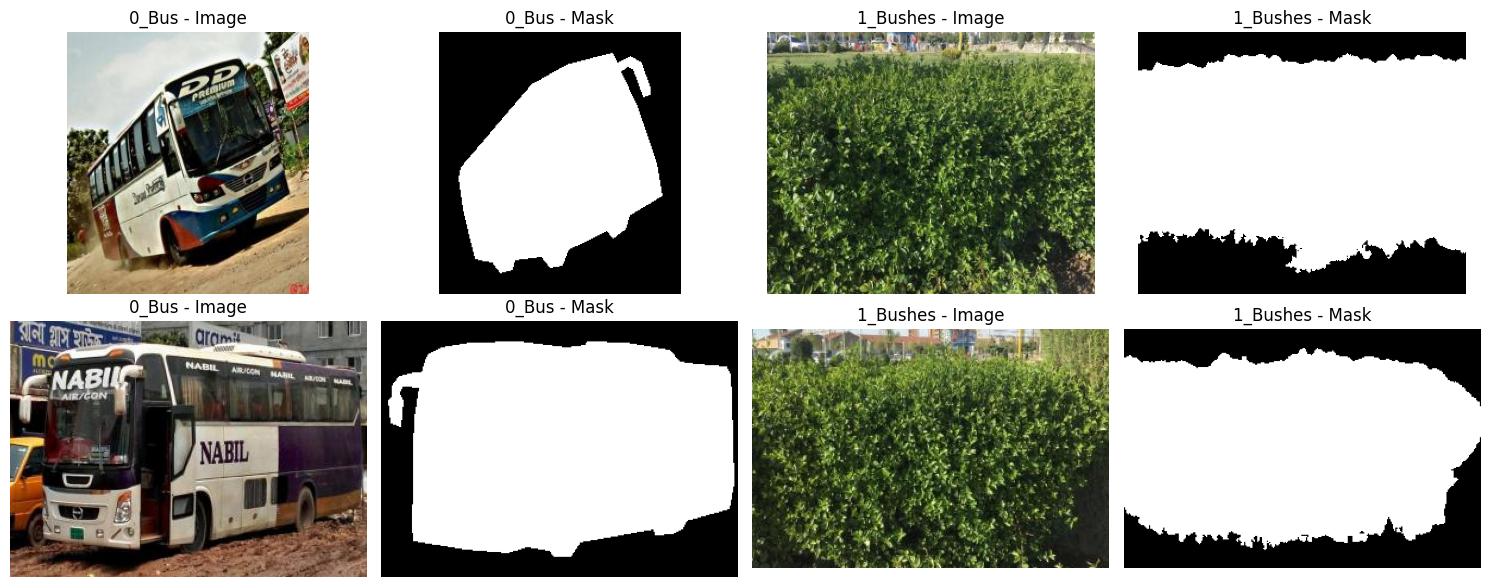

In [7]:
from visualization import visualize_images_and_masks_from_classes
visualize_images_and_masks_from_classes([0, 1, 2], num_images=2)


#### ✅ B. For YOLO-Based Dataset

- **Script:** `Create_yolo_csv.py`
- **Functionality:**
  - Selects 3 key points:
    - One near the center  
    - Two farthest points  
  - **Output:** `output.csv` (can be split into train/val/test )

---


In [8]:
from create_yolo_csv import generate_yolo_csv_splits
dataset_yolo = "dataset_yolo"   # Your root YOLO dataset path
output_dir = "processed_yolo_dataset"  # Output directory for CSVs
generate_yolo_csv_splits(dataset_yolo, output_dir)


Found 36 class folders.
Processing class 32_tree with 111 images.


Processing 32_tree: 100%|██████████| 111/111 [00:34<00:00,  3.24it/s]


Skipping 25_sheep: no images found.
Skipping 18_handbag: no images found.
Skipping 35_yellow_light: no images found.
Processing class 12_crosswalk with 1 images.


Processing 12_crosswalk: 100%|██████████| 1/1 [00:00<00:00,  3.15it/s]


Processing class 21_pothole with 84 images.


Processing 21_pothole: 100%|██████████| 84/84 [00:02<00:00, 33.82it/s]


Skipping 22_rat: no images found.
Skipping 20_person: no images found.
Processing class 19_motorcycle with 1 images.


Processing 19_motorcycle: 100%|██████████| 1/1 [00:00<00:00,  4.47it/s]


Processing class 9_car with 9 images.


Processing 9_car: 100%|██████████| 9/9 [00:01<00:00,  6.67it/s]


Skipping 28_suitcase: no images found.
Skipping 34_umbrella: no images found.
Processing class 6_bicycle with 1 images.


Processing 6_bicycle: 100%|██████████| 1/1 [00:00<00:00,  1.94it/s]


Skipping 26_stairs: no images found.
Processing class 14_elevator with 406 images.


Processing 14_elevator: 100%|██████████| 406/406 [01:41<00:00,  4.01it/s]


Skipping 23_red_light: no images found.
Processing class 1_Bushes with 40 images.


Processing 1_Bushes: 100%|██████████| 40/40 [00:17<00:00,  2.28it/s]


Skipping 10_chair: no images found.
Skipping 2_Person: no images found.
Skipping 11_clock: no images found.
Skipping 24_scooter: no images found.
Skipping 17_gun: no images found.
Processing class 16_green_light with 14 images.


Processing 16_green_light: 100%|██████████| 14/14 [00:02<00:00,  5.65it/s]


Skipping 30_traffic_cone: no images found.
Skipping 7_boat: no images found.
Skipping 29_traffic_light: no images found.
Processing class 3_Truck with 1 images.


Processing 3_Truck: 100%|██████████| 1/1 [00:00<00:00,  3.14it/s]


Skipping 8_branch: no images found.
Skipping 13_door: no images found.
Skipping 33_truck: no images found.
Skipping 4_backpack: no images found.
Skipping 15_fire_hydrant: no images found.
Processing class 0_Bus with 54 images.


Processing 0_Bus: 100%|██████████| 54/54 [00:18<00:00,  2.86it/s]

Skipping 5_bench: no images found.
Skipping 31_train: no images found.
Skipping 27_stop_sign: no images found.
CSV files created with sizes: train=238, val=239, test=245


### 🔹 C. Format CSVs for Training

- **Script:** `reformated_csv.py`
- **Functionality:**
  - Converts separate point columns into a list of three [x, y] pairs  
  - **New CSV Format:**
    ```
    image, label, points
    "img.jpg", "mask.png", "[[x1,y1],[x2,y2],[x3,y3]]"
    ```
  - **Output:**
    - `train_reformatted.csv`  
    - `val_reformatted.csv`  
    - `test_reformatted.csv`

---


In [9]:
from reformated_csv import prepare_csv_with_annotations
input = "processed_yolo_dataset"
splits = ["train", "val", "test"]
prepare_csv_with_annotations(input,splits)


Processing processed_yolo_dataset/train.csv -> processed_yolo_dataset/train_reformatted.csv
Saved reformatted CSV: processed_yolo_dataset/train_reformatted.csv

Processing processed_yolo_dataset/val.csv -> processed_yolo_dataset/val_reformatted.csv
Saved reformatted CSV: processed_yolo_dataset/val_reformatted.csv

Processing processed_yolo_dataset/test.csv -> processed_yolo_dataset/test_reformatted.csv
Saved reformatted CSV: processed_yolo_dataset/test_reformatted.csv




### 🔹 D. Train SAM

- **Optional Args:** `--batch_size`, `--learning_rate`, `--save_dir`, `--num_epochs`, `--patience`, `--weight_decay`, `--image_size`,` --num_workers`,` --num_gpus`
- **Optional Args:** `--train_csv` , `--val_csv`
- **Output:**
  - Checkpoints: `./checkpoints/` (Top 3 models)  
  - Final Model: `sam_lora_final.ckpt`  
  - Logs: Training loss, IoU per epoch

---

In [10]:
from train import run_training

run_training(
    train_csv="processed_yolo_dataset/train_reformatted.csv",
    val_csv="processed_yolo_dataset/val_reformatted.csv"
)

/usr/local/lib/python3.11/dist-packages/torch/utils/data/dataloader.py:624: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


config.json:   0%|          | 0.00/6.57k [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/375M [00:00<?, ?B/s]

INFO:pytorch_lightning.utilities.rank_zero:Using 16bit Automatic Mixed Precision (AMP)
INFO:pytorch_lightning.utilities.rank_zero:GPU available: True (cuda), used: True
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
/usr/local/lib/python3.11/dist-packages/pytorch_lightning/callbacks/model_checkpoint.py:654: Checkpoint directory /content/yolo_dataset/checkpoints exists and is not empty.
INFO:pytorch_lightning.accelerators.cuda:LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
INFO:pytorch_lightning.callbacks.model_summary:
  | Name      | Type                       | Params | Mode 
-----------------------------------------------------------------
0 | model     | SAMForSemanticSegmentation | 93.7 M | train
1 | loss_func | StructureLoss              | 0      | train
-----------------------------------------------------------------
16.8 K    Trainable params
93.7 M    Non-trainable p

Sanity Checking: |          | 0/? [00:00<?, ?it/s]

Training: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

INFO:pytorch_lightning.callbacks.early_stopping:Metric val_iou improved. New best score: 0.748
INFO:pytorch_lightning.utilities.rank_zero:Epoch 0, global step 119: 'val_iou' reached 0.74780 (best 0.74780), saving model to '/content/yolo_dataset/checkpoints/sam-lora-epoch=00-val_iou=0.7478.ckpt' as top 3


Validation: |          | 0/? [00:00<?, ?it/s]

INFO:pytorch_lightning.callbacks.early_stopping:Metric val_iou improved by 0.031 >= min_delta = 0.0. New best score: 0.779
INFO:pytorch_lightning.utilities.rank_zero:Epoch 1, global step 238: 'val_iou' reached 0.77881 (best 0.77881), saving model to '/content/yolo_dataset/checkpoints/sam-lora-epoch=01-val_iou=0.7788.ckpt' as top 3


Validation: |          | 0/? [00:00<?, ?it/s]

INFO:pytorch_lightning.callbacks.early_stopping:Metric val_iou improved by 0.010 >= min_delta = 0.0. New best score: 0.788
INFO:pytorch_lightning.utilities.rank_zero:Epoch 2, global step 357: 'val_iou' reached 0.78845 (best 0.78845), saving model to '/content/yolo_dataset/checkpoints/sam-lora-epoch=02-val_iou=0.7885.ckpt' as top 3


Validation: |          | 0/? [00:00<?, ?it/s]

INFO:pytorch_lightning.utilities.rank_zero:Epoch 3, global step 476: 'val_iou' reached 0.78839 (best 0.78845), saving model to '/content/yolo_dataset/checkpoints/sam-lora-epoch=03-val_iou=0.7884.ckpt' as top 3


Validation: |          | 0/? [00:00<?, ?it/s]

INFO:pytorch_lightning.callbacks.early_stopping:Metric val_iou improved by 0.011 >= min_delta = 0.0. New best score: 0.799
INFO:pytorch_lightning.utilities.rank_zero:Epoch 4, global step 595: 'val_iou' reached 0.79922 (best 0.79922), saving model to '/content/yolo_dataset/checkpoints/sam-lora-epoch=04-val_iou=0.7992.ckpt' as top 3
INFO:pytorch_lightning.utilities.rank_zero:`Trainer.fit` stopped: `max_epochs=5` reached.


✅ Training completed. Best model saved at: /content/yolo_dataset/checkpoints/sam-lora-epoch=04-val_iou=0.7992.ckpt


### 🔹E. Inference code for comparing the base SAM model with the fine-tuned model

- **Scripts:**
  - `run_inference.py` — for fine-tuned model  
  - `run_base_sam_inference.py` — for pretrained model  

- **Output:**
  ```
  finetuned_sam_results2/
    ├── predictions.jpg
    ├── image + prediction + ground truth
  ```
  - CSVs:
    - `finetuned_sam_results.csv` — Sample-wise results  
    - `finetuned_sam_class_iou_summary.csv` — Class-wise IoUs

---

Here ` input path ` is the path of `test_reformated.csv` and `output_path` is the location where you want the results

In [11]:
from run_base_sam_infrence import evaluate_base_sam_on_testset

import pandas as pd

input_path = 'processed_yolo_dataset/test_reformatted.csv'
output_path = 'base_sam_results'

test_df = pd.read_csv(input_path)
evaluate_base_sam_on_testset(test_df, output_path)


Using device: cuda
Loading base SAM model...
Base SAM model loaded successfully!
Loaded 245 test samples
Selected 30 samples for evaluation


  3%|▎         | 1/30 [00:00<00:26,  1.11it/s]

Sample 1/30: Class=Unknown, IoU=0.4909


  7%|▋         | 2/30 [00:01<00:24,  1.14it/s]

Sample 2/30: Class=Unknown, IoU=0.7026


 10%|█         | 3/30 [00:02<00:24,  1.10it/s]

Sample 3/30: Class=Unknown, IoU=0.4398


 13%|█▎        | 4/30 [00:03<00:22,  1.14it/s]

Sample 4/30: Class=Unknown, IoU=0.3125


 17%|█▋        | 5/30 [00:04<00:24,  1.04it/s]

Sample 5/30: Class=Unknown, IoU=0.4297


 20%|██        | 6/30 [00:05<00:23,  1.02it/s]

Sample 6/30: Class=Unknown, IoU=0.3999


 23%|██▎       | 7/30 [00:06<00:19,  1.17it/s]

Sample 7/30: Class=Unknown, IoU=0.6250


 27%|██▋       | 8/30 [00:07<00:19,  1.15it/s]

Sample 8/30: Class=Unknown, IoU=0.6674


 30%|███       | 9/30 [00:07<00:17,  1.22it/s]

Sample 9/30: Class=Unknown, IoU=0.4629


 33%|███▎      | 10/30 [00:08<00:15,  1.32it/s]

Sample 10/30: Class=Unknown, IoU=0.5517


 37%|███▋      | 11/30 [00:09<00:13,  1.40it/s]

Sample 11/30: Class=Unknown, IoU=0.7681


 40%|████      | 12/30 [00:09<00:12,  1.44it/s]

Sample 12/30: Class=Unknown, IoU=0.6649


 43%|████▎     | 13/30 [00:10<00:11,  1.49it/s]

Sample 13/30: Class=Unknown, IoU=0.5111


 47%|████▋     | 14/30 [00:11<00:11,  1.41it/s]

Sample 14/30: Class=Unknown, IoU=0.9472


 50%|█████     | 15/30 [00:11<00:11,  1.35it/s]

Sample 15/30: Class=Unknown, IoU=0.5985


 53%|█████▎    | 16/30 [00:12<00:10,  1.38it/s]

Sample 16/30: Class=Unknown, IoU=0.4605


 57%|█████▋    | 17/30 [00:13<00:09,  1.38it/s]

Sample 17/30: Class=Unknown, IoU=0.8743


 60%|██████    | 18/30 [00:14<00:08,  1.39it/s]

Sample 18/30: Class=Unknown, IoU=0.5227


 63%|██████▎   | 19/30 [00:14<00:08,  1.35it/s]

Sample 19/30: Class=Unknown, IoU=0.5384


 67%|██████▋   | 20/30 [00:15<00:08,  1.20it/s]

Sample 20/30: Class=Unknown, IoU=0.5765


 70%|███████   | 21/30 [00:16<00:07,  1.24it/s]

Sample 21/30: Class=Unknown, IoU=0.6249


 73%|███████▎  | 22/30 [00:17<00:06,  1.25it/s]

Sample 22/30: Class=Unknown, IoU=0.1630


 77%|███████▋  | 23/30 [00:18<00:05,  1.32it/s]

Sample 23/30: Class=Unknown, IoU=0.3273


 80%|████████  | 24/30 [00:18<00:04,  1.37it/s]

Sample 24/30: Class=Unknown, IoU=0.6563


 83%|████████▎ | 25/30 [00:19<00:03,  1.33it/s]

Sample 25/30: Class=Unknown, IoU=0.8432


 87%|████████▋ | 26/30 [00:20<00:02,  1.39it/s]

Sample 26/30: Class=Unknown, IoU=0.4932


 90%|█████████ | 27/30 [00:20<00:02,  1.46it/s]

Sample 27/30: Class=Unknown, IoU=0.6059


 93%|█████████▎| 28/30 [00:21<00:01,  1.49it/s]

Sample 28/30: Class=Unknown, IoU=0.0781


 97%|█████████▋| 29/30 [00:22<00:00,  1.40it/s]

Sample 29/30: Class=Unknown, IoU=0.4021


100%|██████████| 30/30 [00:22<00:00,  1.31it/s]

Sample 30/30: Class=Unknown, IoU=0.7637

Base SAM Inference Results Summary:
Overall Average IoU: 0.5501

Average IoU per Class:
Unknown: 0.5501

Results saved to base_sam_results
Visualizations for 30 samples saved to base_sam_results


Here : ` checkpoint_path ` is the location whrere the best model is resides ,  ` input path ` is the path of `test_reformated.csv` , `output_dir` is the location where you want the results

In [12]:
from run_infrence import evaluate_finetuned_sam_model


checkpoint_path = "/content/yolo_dataset/checkpoints/sam_lora_final.ckpt"
test_df = '/content/yolo_dataset/processed_yolo_dataset/test_reformatted.csv'
output_dir = 'finetuned_sam_results'
evaluate_finetuned_sam_model(checkpoint_path,test_df, output_dir)

Using device: cuda
Model loaded successfully!
Loaded 245 test samples
Selected 30 samples for evaluation


  3%|▎         | 1/30 [00:00<00:22,  1.28it/s]

Sample 1/30: Class=32, IoU=0.5567


  7%|▋         | 2/30 [00:01<00:21,  1.28it/s]

Sample 2/30: Class=32, IoU=0.6592


 10%|█         | 3/30 [00:02<00:21,  1.26it/s]

Sample 3/30: Class=32, IoU=0.8463


 13%|█▎        | 4/30 [00:03<00:20,  1.25it/s]

Sample 4/30: Class=32, IoU=0.6362


 17%|█▋        | 5/30 [00:04<00:21,  1.17it/s]

Sample 5/30: Class=12, IoU=0.9603


 20%|██        | 6/30 [00:05<00:24,  1.00s/it]

Sample 6/30: Class=21, IoU=0.5607


 23%|██▎       | 7/30 [00:06<00:21,  1.09it/s]

Sample 7/30: Class=21, IoU=0.7531


 27%|██▋       | 8/30 [00:07<00:19,  1.11it/s]

Sample 8/30: Class=19, IoU=0.4816


 30%|███       | 9/30 [00:07<00:17,  1.22it/s]

Sample 9/30: Class=9, IoU=0.8185


 33%|███▎      | 10/30 [00:08<00:16,  1.18it/s]

Sample 10/30: Class=6, IoU=0.5848


 37%|███▋      | 11/30 [00:09<00:15,  1.19it/s]

Sample 11/30: Class=14, IoU=0.7656


 40%|████      | 12/30 [00:10<00:14,  1.28it/s]

Sample 12/30: Class=14, IoU=0.7405


 43%|████▎     | 13/30 [00:10<00:12,  1.32it/s]

Sample 13/30: Class=14, IoU=0.8965


 47%|████▋     | 14/30 [00:11<00:11,  1.39it/s]

Sample 14/30: Class=14, IoU=0.4586


 50%|█████     | 15/30 [00:12<00:10,  1.43it/s]

Sample 15/30: Class=14, IoU=0.5328


 53%|█████▎    | 16/30 [00:12<00:10,  1.37it/s]

Sample 16/30: Class=14, IoU=0.9411


 57%|█████▋    | 17/30 [00:13<00:10,  1.18it/s]

Sample 17/30: Class=14, IoU=0.8975


 60%|██████    | 18/30 [00:14<00:09,  1.25it/s]

Sample 18/30: Class=14, IoU=0.5093


 63%|██████▎   | 19/30 [00:15<00:08,  1.25it/s]

Sample 19/30: Class=14, IoU=0.9351


 67%|██████▋   | 20/30 [00:16<00:07,  1.32it/s]

Sample 20/30: Class=14, IoU=0.8014


 70%|███████   | 21/30 [00:16<00:06,  1.31it/s]

Sample 21/30: Class=14, IoU=0.8843


 73%|███████▎  | 22/30 [00:17<00:06,  1.26it/s]

Sample 22/30: Class=14, IoU=0.8237


 77%|███████▋  | 23/30 [00:18<00:05,  1.29it/s]

Sample 23/30: Class=14, IoU=0.7654


 80%|████████  | 24/30 [00:19<00:04,  1.25it/s]

Sample 24/30: Class=14, IoU=0.8910


 83%|████████▎ | 25/30 [00:20<00:04,  1.23it/s]

Sample 25/30: Class=14, IoU=0.8710


 87%|████████▋ | 26/30 [00:20<00:03,  1.23it/s]

Sample 26/30: Class=14, IoU=0.8416


 90%|█████████ | 27/30 [00:21<00:02,  1.25it/s]

Sample 27/30: Class=1, IoU=0.7327


 93%|█████████▎| 28/30 [00:22<00:01,  1.23it/s]

Sample 28/30: Class=16, IoU=0.9613


 97%|█████████▋| 29/30 [00:23<00:00,  1.23it/s]

Sample 29/30: Class=3, IoU=0.7416


100%|██████████| 30/30 [00:24<00:00,  1.24it/s]

Sample 30/30: Class=0, IoU=0.9373

Fine-tuned SAM Inference Results Summary:
Overall Average IoU: 0.7595

Average IoU per Class:
16: 0.9613
12: 0.9603
0: 0.9373
9: 0.8185
14: 0.7847
3: 0.7416
1: 0.7327
32: 0.6746
21: 0.6569
6: 0.5848
19: 0.4816

Results saved to finetuned_sam_results
Visualizations for 30 samples saved to finetuned_sam_results


## 📆 Summary Pipeline Flow

![SAM Pipeline](https://raw.githubusercontent.com/TheLunarLogic/image/main/SAM%20diagram.png)
